<h1> Using Scikit learn

In [1]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import add_dummy_feature
import numpy as np

iris=load_iris(as_frame=True)
X=iris.data
Y=iris.target_names[iris.target]

In [2]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
scaler= StandardScaler()
columns=X.columns
X= pd.DataFrame(scaler.fit_transform(X),columns=columns)

In [3]:
from sklearn.preprocessing import add_dummy_feature
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X=add_dummy_feature(X)
scaler=StandardScaler()
trainx,testx,trainy,testy= train_test_split(X,Y,test_size=0.5)
validx=testx[:len(testx)//2]
validy=testy[:len(testy)//2]
testx=testx[len(testx)//2:]
testy=testy[len(testy)//2:]

In [4]:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder(sparse_output=False)
validy_encoded=ohe.fit_transform(validy.reshape(-1,1),)
trainy_encoded=ohe.fit_transform(trainy.reshape(-1,1),)
testy_encoded=ohe.fit_transform(testy.reshape(-1,1),)

In [5]:
ohe.categories_

[array(['setosa', 'versicolor', 'virginica'], dtype='<U10')]

In [6]:
def softmaxpred(theta,x):
    score=x@theta 
    predicts=[]
    for i in range(len(score)):
        if np.argmax(score[i])==0:
            predicts.append('setosa')
        if np.argmax(score[i])==1:
            predicts.append('versicolor')
        if np.argmax(score[i])==2:
            predicts.append('virginica')
    return np.array(predicts)


In [7]:
def gradientvector(probability,predicts,x):
    gradient=x.T@(probability-predicts)
    return gradient

In [8]:
theta=np.random.randn(5,3) #(5,3)= (no of features +1(for intercept), no of outputs)
predicts=softmaxpred(theta=theta,x=trainx)

In [9]:
def softmaxproba(logit):
    exponentials=np.exp(logit)
    return exponentials/np.sum(exponentials,axis=1,keepdims=True)

In [10]:
from sklearn.metrics import accuracy_score
best_score=0
scores=[]
gradients=[]
theta_paths=[]
n_epochs=5000
best_epoch=0
for epoch in range(n_epochs):
    validy_pred=softmaxpred(theta=theta,x=validx)
    score= accuracy_score(validy,validy_pred)
    scores.append(score)
    if (score>best_score):
        best_score=score
        best_theta= theta
        best_epoch=epoch
    graident=(trainx.T@(softmaxproba(trainx@theta)-trainy_encoded))/len(trainx)
    gradients.append(graident)
    theta=theta-0.01*graident
    theta_paths.append(theta)
    
    

In [11]:
testx

array([[ 1.00000000e+00, -1.02184904e+00,  1.24920112e+00,
        -1.34022653e+00, -1.31544430e+00],
       [ 1.00000000e+00,  4.32165405e-01, -3.62176246e-01,
         3.08058854e-01,  1.32509732e-01],
       [ 1.00000000e+00,  1.89829664e-01, -1.31979479e-01,
         5.92245988e-01,  7.90670654e-01],
       [ 1.00000000e+00,  6.74501145e-01,  3.28414053e-01,
         4.21733708e-01,  3.95774101e-01],
       [ 1.00000000e+00, -2.94841818e-01, -1.31979479e-01,
         1.94384000e-01,  1.32509732e-01],
       [ 1.00000000e+00, -4.16009689e-01, -1.51316008e+00,
         2.38717193e-02, -1.30754636e-01],
       [ 1.00000000e+00,  1.28034050e+00,  9.82172869e-02,
         6.49083415e-01,  3.95774101e-01],
       [ 1.00000000e+00,  7.95669016e-01,  3.28414053e-01,
         7.62758269e-01,  1.05393502e+00],
       [ 1.00000000e+00, -1.73673948e-01, -1.05276654e+00,
        -1.46640561e-01, -2.62386821e-01],
       [ 1.00000000e+00, -4.16009689e-01, -1.74335684e+00,
         1.37546573e-01

In [12]:
theta_paths

[array([[-1.77679148, -0.72697206, -1.16593658],
        [-1.34078643, -0.23850697,  1.40706207],
        [-0.75409532, -0.3313898 ,  1.58262645],
        [-1.86701875, -1.53924647, -2.01329602],
        [ 1.40907855, -1.14626756, -1.83706295]]),
 array([[-1.77584133, -0.72743387, -1.16642493],
        [-1.34502609, -0.23757054,  1.4103653 ],
        [-0.74949783, -0.33217646,  1.57881562],
        [-1.87332698, -1.53810253, -2.00813172],
        [ 1.40263925, -1.14533099, -1.83156022]]),
 array([[-1.77487593, -0.72790753, -1.16691667],
        [-1.34924626, -0.23662833,  1.41364325],
        [-0.74490485, -0.33296423,  1.57501042],
        [-1.87961453, -1.53695387, -2.00299283],
        [ 1.39622266, -1.14439099, -1.82608363]]),
 array([[-1.7738955 , -0.72839287, -1.16741175],
        [-1.35344701, -0.23568042,  1.4168961 ],
        [-0.74031642, -0.33375311,  1.57121086],
        [-1.88588144, -1.53580055, -1.99787925],
        [ 1.38982876, -1.14344763, -1.82063309]]),
 array([[-1.

In [13]:
theta_paths[-1]

array([[-1.90148752,  0.34687121, -2.11508381],
       [-2.00231879,  0.52912047,  1.30096699],
       [ 1.62261232, -0.29265935, -0.83281163],
       [-3.94745346, -1.28953309, -0.18257468],
       [-0.67629554, -1.74614886,  0.84819244]])

In [14]:
best_epoch

2845

In [15]:
theta_paths[0], best_theta

(array([[-1.77679148, -0.72697206, -1.16593658],
        [-1.34078643, -0.23850697,  1.40706207],
        [-0.75409532, -0.3313898 ,  1.58262645],
        [-1.86701875, -1.53924647, -2.01329602],
        [ 1.40907855, -1.14626756, -1.83706295]]),
 array([[-1.8566631 , -0.08475348, -1.72828355],
        [-1.93809083,  0.39766551,  1.36819399],
        [ 1.28417844, -0.34298097, -0.44405613],
        [-3.64576282, -1.26408329, -0.50971513],
        [-0.37326653, -1.48025526,  0.27926983]]))

In [16]:
accuracy_score(testy,softmaxpred(theta_paths[best_epoch],testx))


0.8947368421052632

Text(2845.05, 0.8689189189189189, 'best_score')

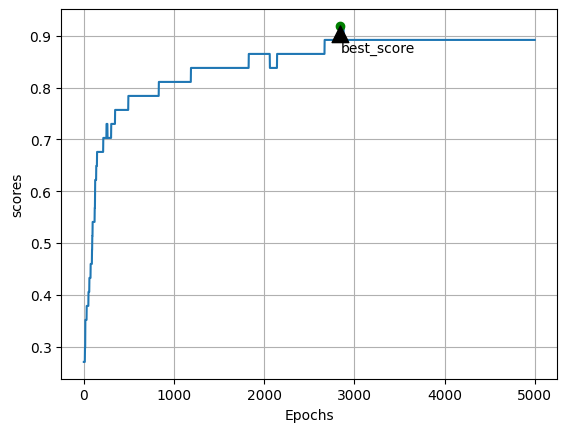

In [17]:
import matplotlib.pyplot as plt
plt.plot(scores)
plt.plot(best_epoch,best_score,marker='o',color="green")
plt.grid()
plt.xlabel("Epochs")
plt.ylabel("scores")
plt.annotate("best_score",xy=(best_epoch,best_score),xytext=(best_epoch+0.05,best_score-0.05),arrowprops=dict(facecolor="black",width=0.2))

Introducing cross entropy cost function as score and replacing variable name score with error

In [18]:
(np.log(softmaxproba(validx@theta))).shape

(37, 3)

In [19]:
len(validx)

37

In [20]:
(-validy_encoded.T@np.log(softmaxproba(validx@theta))/len(validx))<best_score

array([[ True,  True, False],
       [False,  True,  True],
       [False, False,  True]])

using batch gradient descent

In [21]:
from sklearn.metrics import accuracy_score
theta=np.random.randn(5,3)

best_error=np.array([[np.inf , np.inf,np.inf],
       [np.inf, np.inf, np.inf],
       [np.inf, np.inf, np.inf]])
errors=[]
gradients=[]
theta_paths=[]
n_epochs=5000
best_epoch=0
for epoch in range(n_epochs):
    validy_pred=softmaxpred(theta=theta,x=validx)
    error= -validy_encoded.T@np.log(softmaxproba(validx@theta))/len(validx)
    errors.append(error)
    if ((error<best_score).any()):
        best_error=error
        best_theta= theta
        best_epoch=epoch
    graident=(trainx.T@(softmaxproba(trainx@theta)-trainy_encoded))/len(trainx)
    gradients.append(graident)
    theta=theta-0.01*graident
    theta_paths.append(theta)

In [22]:
best_theta

array([[-1.01123837,  1.36912401, -1.59781608],
       [-2.43361356,  0.48960532,  0.91591259],
       [ 2.4634044 , -0.14449421, -0.72757327],
       [-0.9592991 ,  0.45776878,  3.37457867],
       [-0.35672217, -0.56542156,  1.214468  ]])

In [23]:
accuracy_score(testy,softmaxpred(best_theta,testx))

0.9210526315789473

using stochastic gradient descent

In [26]:
indx= np.random.randint(0,len(validx))
indx

31

In [28]:
from sklearn.metrics import accuracy_score
theta=np.random.randn(5,3)
best_error=np.array([[np.inf , np.inf,np.inf],
       [np.inf, np.inf, np.inf],
       [np.inf, np.inf, np.inf]])
errors=[]
gradients=[]
theta_paths=[]
n_epochs=5000
best_epoch=0
for epoch in range(n_epochs):
    indx= np.random.randint(0,len(validx))
    validy_pred=softmaxpred(theta=theta,x=validx)
    error= -validy_encoded.T@np.log(softmaxproba(validx@theta))/len(validx)
    errors.append(error)
    if ((error<best_score).any()):
        best_error=error
        best_theta= theta
        best_epoch=epoch
    graident=(trainx[indx].T@(softmaxproba(trainx[indx]@theta)-trainy_encoded[indx]))
    gradients.append(graident)
    theta=theta-0.01*graident
    theta_paths.append(theta)

AxisError: axis 1 is out of bounds for array of dimension 1